In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
DATA2_PATH=r"C:\Users\B.BASI REDDY\Documents\TB_Chest_Radiography_Database"
DATA2_TRAIN_NORNAL=DATA2_PATH+"/Normal/"
DATA2_TRAIN_Tuberculosis=DATA2_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA2_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
# DATA2_TRAIN_NORNAL=DATA2_TRAIN_NORNAL+Normal_img
# DATA2_TEST_Tuberculosis=DATA2_TEST_Tuberculosis+Tuberculosis_img
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA2_TRAIN_NORNAL+ "/" +dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=1
dtuber["images"]=DATA2_TRAIN_Tuberculosis +"/"+ dtuber["images"]


DF2=pd.concat([dnorm,dtuber],ignore_index=True)
DF2 = DF2.sample(frac=1, random_state=42).reset_index(drop=True)
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels,mat_images
0,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[170, 175, 175, 174, 171, 174, 170, 165, 164,..."
2,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[9, 10, 34, 46, 52, 57, 65, 70, 74, 83, 105, ..."
3,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,..."
...,...,...,...
75,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[163, 113, 70, 46, 30, 21, 14, 11, 9, 9, 10, ..."
76,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,..."
77,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[63, 183, 168, 154, 143, 141, 135, 133, 141, ..."
78,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [3]:
F_DATA=DF2
F_DATA.sample(frac=1, random_state=42).reset_index(drop=True)
F_DATA

,images,labels,mat_images
0,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[170, 175, 175, 174, 171, 174, 170, 165, 164,..."
1,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,..."
2,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[0, 1, 16, 6, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 4..."
3,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[248, 243, 237, 231, 226, 222, 219, 218, 214,..."
4,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[30, 11, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 5, ..."
...,...,...,...
75,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[62, 37, 24, 17, 10, 9, 8, 9, 7, 7, 7, 7, 7, ..."
76,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,..."
77,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1,"[[0, 0, 0, 0, 0, 0, 1, 2, 6, 6, 6, 6, 6, 6, 6,..."
78,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [4]:
X=F_DATA["mat_images"]
Y=F_DATA["labels"]

In [5]:
X=X/255

In [6]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,4)

In [7]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64,)
(64, 4)
(16,)
(16, 4)


In [8]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [9]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 224, 224)
(64, 4)
(16, 224, 224)
(16, 4)


In [11]:
import tensorflow as tf
import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [ ]:
model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),batch_size=64) 

Epoch 1/60
1/1 [==============================] - 4s 4s/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.7880 - val_accuracy: 0.8750
Epoch 2/60
1/1 [==============================] - 4s 4s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.7615 - val_accuracy: 0.8750
Epoch 3/60
1/1 [==============================] - 4s 4s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.8138 - val_accuracy: 0.8750
Epoch 4/60
1/1 [==============================] - 4s 4s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.8758 - val_accuracy: 0.8750
Epoch 5/60
1/1 [==============================] - 4s 4s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.9182 - val_accuracy: 0.8750
Epoch 6/60
1/1 [==============================] - 4s 4s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.9329 - val_accuracy: 0.8750
Epoch 7/60
1/1 [==============================] - 4s 4s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9214 - val_accuracy: 0.8750
Epoch 8/60
1/1 [=========================

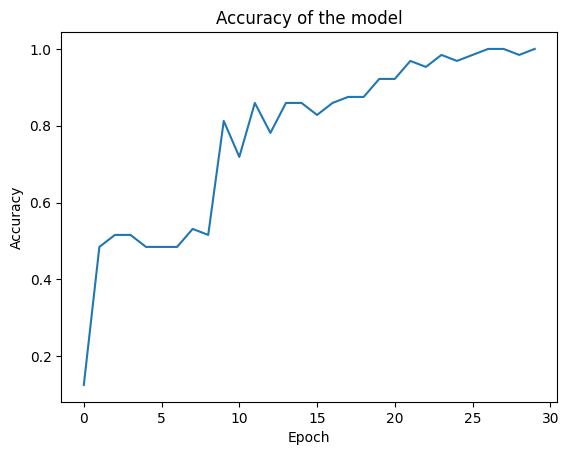

In [13]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 353ms/step


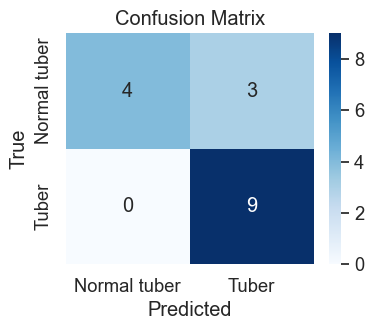

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['Normal tuber', 'Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print("Classification Report:")
print(classification_report(y_true,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.75      1.00      0.86         9

    accuracy                           0.81        16
   macro avg       0.88      0.79      0.79        16
weighted avg       0.86      0.81      0.80        16



1/1 [==============================] - 0s 67ms/step


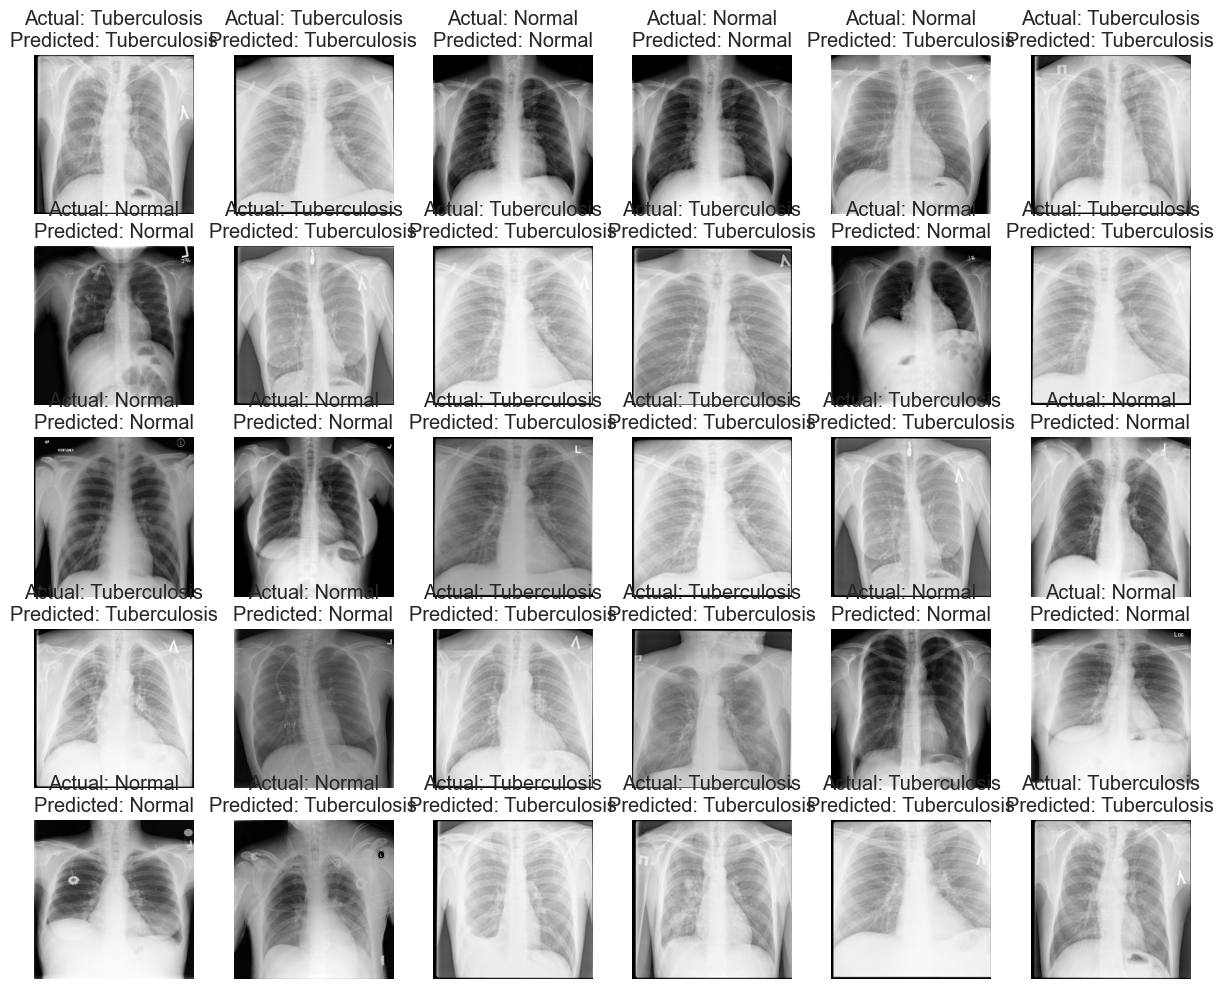

In [17]:
import random as rd

plt.figure(figsize=(15, 12))

for i in range(30):
    random_idx = rd.randint(0, len(F_DATA) - 1)
    img_path = F_DATA['images'][random_idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None and img.size > 0:
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)
        actual_class = "Tuberculosis" if F_DATA['labels'][random_idx] == 1 else "Normal"

        # Predict class probabilities
        class_probabilities = model.predict(img)

        # Determine the predicted class based on the highest probability
        if class_probabilities[0, 1] > class_probabilities[0, 0]:
            predicted_class = "Tuberculosis"
        else:
            predicted_class = "Normal"

        plt.subplot(5, 6, i + 1)
        plt.imshow(img[0], cmap='gray')
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        plt.axis('off')
    else:
        print(f"Image at index {random_idx} could not be loaded.")

plt.show()


In [18]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('tbd.keras')

# Evaluate the model on the test data
accuracy = loaded_model.evaluate(X_test, y_test)[1]

print(f"Accuracy of the loaded model: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 420ms/step - loss: 0.6090 - accuracy: 0.6875
Accuracy of the loaded model: 68.75%
